In [55]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *
from venn import venn

HGNC, ENSID2Entrez, GeneSymbol2Entrez, Entrez2Symbol, allen_mouse_genes = LoadGeneINFO()
ExpMat, ExpZscoreMat, ExpMatNorm, ExpZscoreMatNorm = LoadExpressionMatrices()
ExpMat = pd.read_csv("dat/Jon_data/energy-exp_level.csv", index_col="ROW")
gnomad_cons = pd.read_csv("../dat/genes/gnomad.v2.1.1.lof_metrics.by_gene.txt",
                          delimiter="\t", index_col="gene")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
#Jon

In [57]:
G1 = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/2200.txt")
G2 = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/10522.txt")
#Agg_match_df #= pd.read_csv("dat/Jon_data/", index_col="GENE")

In [58]:
Match_DF = pd.DataFrame(data=[G1["2200"].values, G2["10522"].values], index=[2200, 10522])

In [59]:
Match_DF.head(2)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2200,2081,50945,3181,84451,6936,3263,51655,1761,2768,53407,...,10693,221150,345222,127707,4694,441871,93166,5283,55336,933
10522,5277,3167,1158,7204,3745,5515,282996,23353,140894,50650,...,9677,5411,113026,3760,339855,7478,388610,23025,284323,9350


In [60]:
FBN12MutN = {2200:1}
DEAF12MutN = {10522:1}

In [61]:
FBN1_explevel_Mutcount = ExpAVGWithExpMatch(ExpMat, FBN12MutN, Match_DF,
                                              csv_fil = None)
DEAF1_explevel_Mutcount = ExpAVGWithExpMatch(ExpMat, DEAF12MutN, Match_DF,
                                              csv_fil = None)

In [62]:
Jon_res_FBN1 = pd.read_csv("dat/Jon_data/2200.txt", index_col="ROW")
Jon_res_DEAF1 = pd.read_csv("dat/Jon_data/10522.txt", index_col="ROW")

0.9999999999987106 0.0


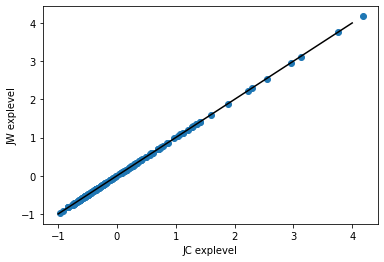

In [63]:
X, Y = [], []
for _str, eee in Jon_res_FBN1.loc[r'energy-exp_level-match_zscore-w_vol_weight.csv:"2200"',:].items():
    if eee == eee:
        X.append(eee)
        Y.append(FBN1_explevel_Mutcount.loc[_str, "EFFECT"])
r, p = pearsonr(X, Y)
print(r, p)
plt.scatter(X, Y)
plt.plot([-1,4],[-1,4], c='black')
plt.xlabel("JC explevel")
plt.ylabel("JW explevel")
plt.show()

0.9999999999991181 0.0


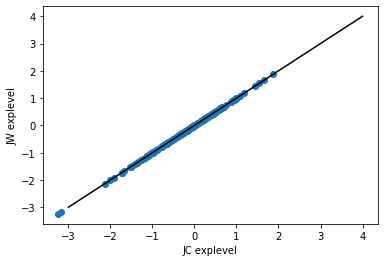

In [64]:
X, Y = [], []
for _str, eee in Jon_res_DEAF1.loc[r'energy-exp_level-match_zscore-w_vol_weight.csv:"10522"',:].items():
    if eee == eee:
        X.append(eee)
        Y.append(DEAF1_explevel_Mutcount.loc[_str, "EFFECT"])
r, p = pearsonr(X, Y)
print(r, p)
plt.scatter(X, Y)
plt.plot([-3,4],[-3,4], c='black')
plt.xlabel("JC explevel")
plt.ylabel("JW explevel")
plt.show()

In [72]:
spec_bias2 = pd.read_csv("dat/bias/test3.csv", index_col = "STR")
spec_bias2 = spec_bias.sort_values("EFFECT2", ascending=False)

In [73]:
spec_bias2.head(2)

,EFFECT,REGION,Rank,InCircuit,TrimRank,Pvalue,EFFECT2
STR,,,,,,,
Subiculum_ventral_part,0.503291,Hippocampal_formation,5,0,40,0.000999,0.535837
Field_CA1,0.568658,Hippocampal_region,2,1,4,0.000999,0.507316


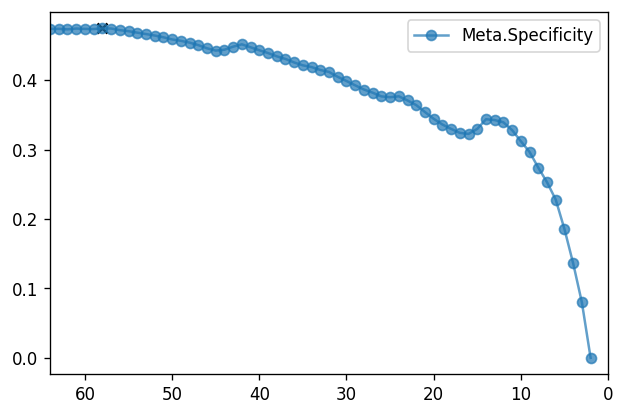

In [79]:
ShowTrimmingProfile([spec_bias2], Names=["Meta.Specificity"], topN=64, 
                    ConnFil="../dat/allen-mouse-conn/jw-conn-al1.csv")

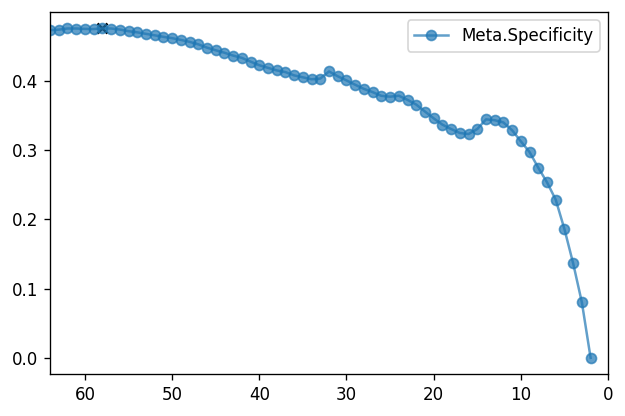

In [80]:
ShowTrimmingProfile([spec_bias2], Names=["Meta.Specificity"], topN=64, 
                    ConnFil="../dat/allen-mouse-conn/jw-conn-al0.csv")

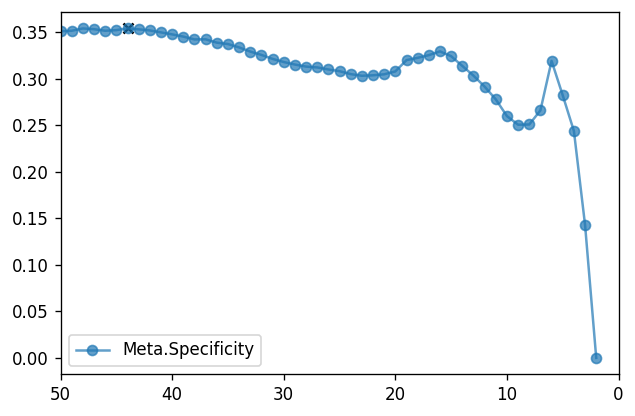

In [81]:
ShowTrimmingProfile([spec_bias2], Names=["Meta.Specificity"], topN=50, 
                    ConnFil="../dat/allen-mouse-conn/jw-conn-al1.csv")

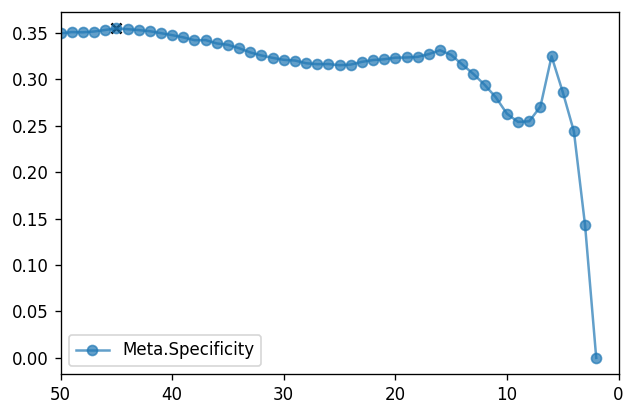

In [82]:
ShowTrimmingProfile([spec_bias2], Names=["Meta.Specificity"], topN=50, 
                    ConnFil="../dat/allen-mouse-conn/jw-conn-al0.csv")